In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [62]:
# basic imports 
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score, roc_curve
from sklearn.metrics import recall_score ,precision_score,f1_score,roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [4]:
train_data=pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test_data=pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
# get columns in t_d
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Data Cleaning Process**

In [6]:
# check if all the dtypes are appropriate
train_data.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
# set with appropriate dtypes
train_data["mobile_wt"]=train_data["mobile_wt"].astype('float64')
train_data["pc"]=train_data["pc"].astype('float64')
train_data["px_height"]=train_data["px_height"].astype('float64')
train_data["px_width"]=train_data["px_width"].astype('float64')
train_data["sc_h"]=train_data["sc_h"].astype('float64')
train_data["talk_time"]=train_data["talk_time"].astype('float64')
train_data["price_range"]=train_data["price_range"].astype('float64')
train_data.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt        float64
n_cores            int64
pc               float64
px_height        float64
px_width         float64
ram                int64
sc_h             float64
sc_w               int64
talk_time        float64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

In [8]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188.0,2,...,20.0,756.0,2549,9.0,7,19.0,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136.0,3,...,905.0,1988.0,2631,17.0,3,7.0,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145.0,5,...,1263.0,1716.0,2603,11.0,2,9.0,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131.0,6,...,1216.0,1786.0,2769,16.0,8,11.0,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141.0,2,...,1208.0,1212.0,1411,8.0,2,15.0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106.0,6,...,1222.0,1890.0,668,13.0,4,19.0,1,1,0,0.0
1996,1965,1,2.6,1,0,0,39,0.2,187.0,4,...,915.0,1965.0,2032,11.0,10,16.0,1,1,1,2.0
1997,1911,0,0.9,1,1,1,36,0.7,108.0,8,...,868.0,1632.0,3057,9.0,1,5.0,1,1,0,3.0
1998,1512,0,0.9,0,4,1,46,0.1,145.0,5,...,336.0,670.0,869,18.0,10,19.0,1,1,1,0.0


No missing data 

In [9]:
# get column names with null values 
null_cols=[]
for x in train_data.columns:
    if train_data[train_data[x].isna()==True].shape[0]!=0:
        null_cols.append(x)
null_cols


[]

In [14]:
'''
Identify the types of data in this dataset
Binary Categorical
    blue         : Has bluetooth or not?
    dual_sim     : Has dual sim support or not ?
    four_g       : Has 4G or not ?
    touch_screen : Has touch screen or not ?
    three_g      : Has 3G or not ?
    wifi         : Has wifi or not ?
Numerical 
   clock_speed   : Speed at which microprocessor executes instructions
   battery_power : Total energy a battery can store in one time measured in mAh
   mobile_wt     : Weight of mobile phone
   px_height     : Pixel Resolution Height
   px_width      : Pixel Resolution Width
   ram           : Random Access Memory in Megabytes
   sc_h          : Screen Height of mobile in cm
   sc_w          : Screen Width of mobile in cm
   talk_time     : Longest time that a single battery charge will last when you are
Terget variable: price_range: holds the price ranges
'''

'\nIdentify the types of data in this dataset\nBinary Categorical\n    blue         : Has bluetooth or not?\n    dual_sim     : Has dual sim support or not ?\n    four_g       : Has 4G or not ?\n    touch_screen : Has touch screen or not ?\n    three_g      : Has 3G or not ?\n    wifi         : Has wifi or not ?\nNumerical \n   clock_speed   : Speed at which microprocessor executes instructions\n   battery_power : Total energy a battery can store in one time measured in mAh\n   mobile_wt     : Weight of mobile phone\n   px_height     : Pixel Resolution Height\n   px_width      : Pixel Resolution Width\n   ram           : Random Access Memory in Megabytes\n   sc_h          : Screen Height of mobile in cm\n   sc_w          : Screen Width of mobile in cm\n   talk_time     : Longest time that a single battery charge will last when you are\nTerget variable: price_range: holds the price ranges\n'

Exploratory Data Analysis (EDA)

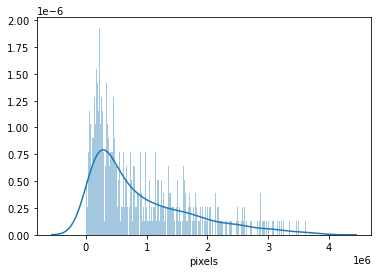

In [10]:
# pixels on the screen 
train_data["pixels"]=train_data["px_height"]*train_data["px_width"]
test_data["pixels"]=test_data["px_height"]*test_data[""]
sns.distplot(train_data["pixels"],bins=1000)

In [18]:
def resolution(x):
    if x<921600:
        return 'sd'
    if x>=921600 and x<2073600:
        return 'hd'
    if x>=2073600 and x<3686400:
        return 'fhd'
    if x>=3686400 and x<8294400:
        return 'qhd'
    else:
        return '4k'
avg_pixels=train_data["pixels"].describe()["mean"]
resolution(avg_pixels)

'sd'

In [19]:
resolutions={1920*1080:'fhd',1280*720:'hd',2560*1440:'qhd',3840*2160:'4k'}
resolutions

{2073600: 'fhd', 921600: 'hd', 3686400: 'qhd', 8294400: '4k'}

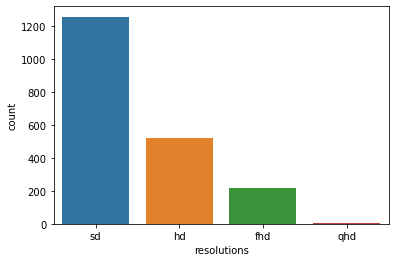

In [24]:
# place the various pixels in resolution categories
def resolution(x):
    if x<921600:
        return 'sd'
    if x>=921600 and x<2073600:
        return 'hd'
    if x>=2073600 and x<3686400:
        return 'fhd'
    if x>=3686400 and x<8294400:
        return 'qhd'
    else:
        return '4k'
train_data["resolutions"]=train_data["pixels"].apply(resolution)
sns.countplot(x=train_data["resolutions"]);

In [25]:
# shows all the value counts for the features
for x in train_data.columns:
    print(train_data[x].value_counts())



1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64
0    1010
1     990
Name: blue, dtype: int64
0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64
0.1    320
0.2    

In [26]:
#gets count of null values 
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
pixels           0
resolutions      0
dtype: int64

In [27]:
# brief stats of every column
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


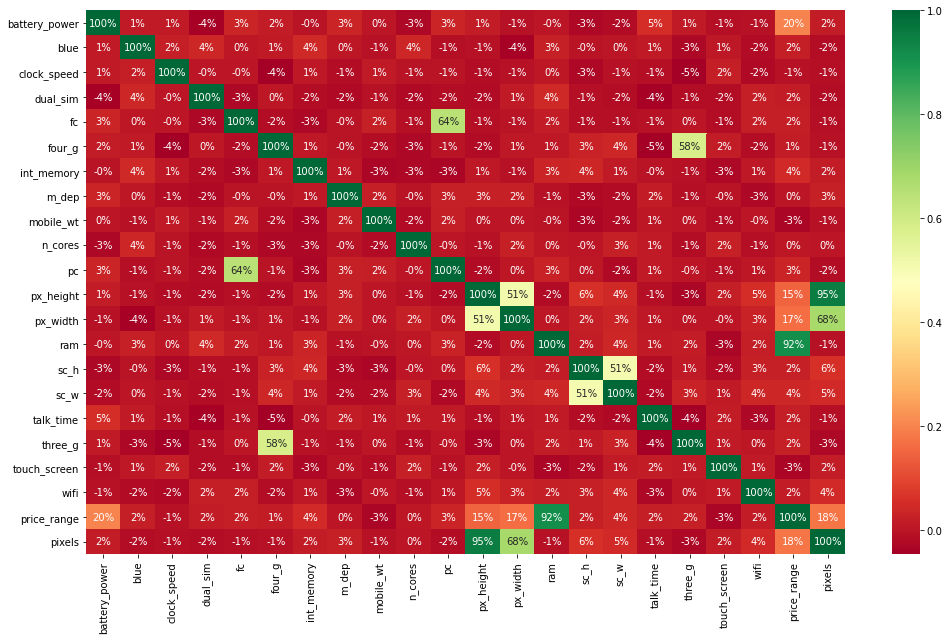

In [28]:
# it appears that columns pixels,battery_power,ram are correlated with price range 
corr=train_data.corr()
plt.figure(figsize = (17,10))
sns.heatmap(corr,annot=True, fmt= ".0%" , cmap = "RdYlGn")

Modelling Based on Selected Features

In [59]:
X=train_data[["pixels","ram","battery_power"]]
Y=train_data['price_range']
test=test_data[["pixels","ram","battery_power"]]
scaler = StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.4, random_state=0)
display(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1200, 3)

(800, 3)

(1200,)

(800,)

In [60]:
model_name , l_accuracy, l_recall , l_precision , l_specificity, l_f1_scr  = [], [] , [] ,[] , [] , []

In [71]:
# implement logistic regression 
model = LogisticRegression( solver = 'newton-cg' ,multi_class='multinomial')
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train , y_train_pred)*100
test_acc  = accuracy_score(y_test  , y_test_pred)*100
precision = precision_score(y_test , y_test_pred, average = "weighted")
recall    = recall_score(y_test , y_test_pred, average = "weighted")
f1_scr    = f1_score(y_test , y_test_pred, average = "weighted")

print("Train Set Accuracy:"+str(train_acc))
print("Test Set Accuracy:"+str(test_acc))

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Train Set Accuracy:84.25
Test Set Accuracy:84.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


,pixels,ram,battery_power
0,319112,3476,1043
1,639322,3895,841
2,1734820,2396,1807
3,516840,3893,1546
4,606690,1773,1434
...,...,...,...
995,587972,2121,1700
996,1880064,1933,609
997,393525,1223,1185
998,31616,2509,1533


,pixels,ram,battery_power
0,15120.0,2549,842
1,1799140.0,2631,1021
2,2167308.0,2603,563
3,2171776.0,2769,615
4,1464096.0,1411,1821
...,...,...,...
1995,2309580.0,668,794
1996,1797975.0,2032,1965
1997,1416576.0,3057,1911
1998,225120.0,869,1512
